# PINNs y Sistemas No-Lineales de EDOs

# [Game theory](https://pmc.ncbi.nlm.nih.gov/articles/PMC6813171/)
La fitness de $𝑅_𝐴$
(la subpoblación resistente al tratamiento
$𝐴$) se refiere a su capacidad relativa para sobrevivir, reproducirse o proliferar en el contexto del sistema considerado, comparado con otras subpoblaciones $\left(S, R_B \right)$

La fitness de $R_A$ se ve afectada por:
1.  
Costo de resistencia $\left(c_A \right)$
Este es un costo fijo que penaliza la fitness de $R_A$ ya que ser resistente al tratamiento $A$ probablemente implica algún gasto metabólico o desventaja evolutiva.
2.   
Efecto del tratamiento $B \left(d_B \right)$
Aunque $R_A$ es resistente a $A$ es susceptible al tratamiento $B$. Cuando se aplica $B$, disminuye la fitness de $R_A$ debido al impacto directo del tratamiento.



1.- Subpoblaciones y sus proporciones

* $S$: Población susceptible a ambos

*   $R_A$: Población resistente al tratamiento
$𝐴$ pero susceptible a $B$
*  
$R_B$: Población resistente al tratamiento
$B$ pero susceptible a $A$
*   
$p_A \left(t \right)$ :  Proporción de $R_A$ en el tiempo $t$
*   
$p_B \left(t \right)$ :  Proporción de $R_B$ en el tiempo $t$

*   
$1-p_A \left(t \right)-p_B \left(t \right)$: Proporción de $S$

2.- Costos de resistencia
* $c_A$: costo fijo que afecta la fitness de $R_A$
* $c_B$: costo fijo que afecta la fitness de $R_B$

3.- Impacto de los tratamientos
* $d_A(t)$ costo de aplicar el tratamiento A en el tiempo t que afecta a $S$ y $R_B$
* $d_B(t)$ costo de aplicar el tratamiento B en el tiempo t que afecta a $S$ y $R_A$

4.- Interacciones entre poblaciones:
* $X(t)$: Beneficio/cosot extra de las interacciones de $R_A$ con $S$ bajo $A$


* $Y(t)$: Beneficio/cosot extra de las interacciones de $R_B$ con $S$ bajo $B$

Las ecuaciones para la fitness de cada subpoblación son:

- $ W(R_A) = 1 - c_A - d_B(t) + (1 - p_A) X(t) $

- $ W(R_B) = 1 - c_B - d_A(t) + (1 - p_B) Y(t) $

- $ W(S) = 1 - d_A(t) - d_B(t) $

---

### **Sistema de ecuaciones**

El modelo describe la dinámica de las proporciones de cada subpoblación.
$
\frac{dp_A}{dt} = p_A \cdot \left( W(R_A) - \bar{W} \right)
$

$
\frac{dp_B}{dt} = p_B \cdot \left( W(R_B) - \bar{W} \right)$

donde:

$
\bar{W} = p_A \cdot W(R_A) + p_B \cdot W(R_B) + (1 - p_A - p_B) \cdot W(S).
$

El término $(\bar{W})$ representa el **fitness promedio de toda la población**.


In this case chemotherapy is
applied first for a duration of 25 time steps and relatively low cost (0.2) followed by the p53
vaccine for 75 time steps with varying degrees of cost (0.2)

$C_A=0.2$  (cost of cells suscpetible to chemoterapy)

$C_B= 0.4$  (cost of cells susceptible to the p53 vaccine)

$d_A(t)=0.2$ $ t<.25$

$d_A(t)=0 $ $ t>.25$

$d_B(t)=0$ $ t<.25$

$d_B(t)=0.4 $ $ t>.25$

$X(t)=0.5$
$Y(t)=0.5$

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Input, Dense

In [4]:
u_hat = tf.keras.models.Sequential([
    Input((1,)),
    Dense(units=32, activation='sigmoid'),
    Dense(units=2)
])

u_hat.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [6]:
def treatment_costs(t):
    """
    Calcula los costos dinámicos de tratamiento d_A y d_B en función del tiempo t,
    considerando t como un tensor.
    """
    d_A = tf.where(t <= 0.25, 0.2, 0.0)
    d_B = tf.where(t <= 0.25, 0.0, 0.4)

    return d_A, d_B


In [7]:
def loss_function(t, model):

    t = t.reshape(-1, 1)
    t = tf.constant(t, dtype=tf.float32)

    t_0 = tf.zeros((1, 1))
    p_A_0 = tf.constant([[0.50]])
    p_B_0 = tf.constant([[0.30]])

    one = tf.concat([p_A_0, p_B_0], axis=1)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(t)

        u = model(t)
        u_t = tf.concat([tape.gradient(u[:, i], t) for i in range(u.shape[1])], axis=1)
    """print(f"Shape of u: {u.shape}")
    """
    """print(f"Shape of u: {u.shape}")
    print(f"Shape of u_t: {u_t.shape}")"""
    u_1t = u_t[:, 0:1]
    u_2t = u_t[:, 1:2]

    u_1 = u[:, 0:1]
    u_2 = u[:, 1:2]  #
    if u_2.shape[1] == 0:
      raise ValueError("El modelo no está produciendo suficientes salidas.")
    c_A, c_B = 0.2, 0.4
    X_t, Y_t = 0.5, 0.5
    d_A, d_B = treatment_costs(t)
    W_S = 1 - d_A - d_B
    W_RA= 1 - c_A - d_B + (1-u_1)* X_t
    W_RB= 1 - c_B - d_A + (1-u_2)* Y_t
    W= u_1*W_RA + u_2*W_RB + (1-u_1-u_2)*W_S

    """print("c1: ", c_A)
    print(f"u_1: {u_1.numpy()}, u_2: {u_2.numpy()}")
    print(f"d_A: {d_A}, d_B: {d_B}")
    print(f"W_RA: {W_RA.numpy()}, W_RB: {W_RB.numpy()}, W_S: {W_S}")
    print(f"W: {W.numpy()}")"""

    epsilon = 1e-8
    physics_lossE1 = u_1t - u_1 * tf.clip_by_value(W_RA - W, -1e6, 1e6)
    physics_lossE2 = u_2t - u_2 * tf.clip_by_value(W_RB - W, -1e6, 1e6)



    data_loss = model(t_0) - one
    #print(f"Data loss: {tf.reduce_mean(data_loss)}")

    square_loss = tf.square(physics_lossE1) +  tf.square(physics_lossE2) +  tf.reduce_sum(tf.square(data_loss))
    """print(f"Physics loss1: {tf.reduce_mean(physics_lossE1)}")
    print(f"Physics loss2: {tf.reduce_mean(physics_lossE2)}")

    print("Shape of u:", u.shape)
    print("Shape of u_t:", u_t.shape)
    print("Shape of W_RA:", W_RA.shape)
    print("Shape of W_RB:", W_RB.shape)
    print("Shape of W:", W.shape)"""

    total_loss = tf.reduce_mean(square_loss)

    return total_loss

In [8]:
t_train = np.linspace(0, 1, 21).reshape(-1, 1)

In [9]:
u_hat = tf.keras.models.Sequential([
    Input((1,)),
    Dense(units=32, activation='sigmoid'),
    Dense(units=2)
])

u_hat.summary()

u_sample = u_hat(t_train)

print(f"Salida del modelo: {u_sample.numpy()}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130 (520.00 B)

 Trainable params: 130 (520.00 B)

 Non-trainable params: 0 (0.00 B)

Salida del modelo: [[-0.9689326   0.14388295]
 [-0.96920675  0.1415334 ]
 [-0.9694812   0.13918424]
 [-0.96975595  0.13683572]
 [-0.97003114  0.13448827]
 [-0.9703072   0.13214219]
 [-0.970584    0.12979773]
 [-0.9708618   0.1274552 ]
 [-0.9711408   0.1251151 ]
 [-0.9714213   0.12277767]
 [-0.9717031   0.12044315]
 [-0.97198695  0.1181121 ]
 [-0.97227234  0.11578458]
 [-0.97255987  0.11346103]
 [-0.97284967  0.11114185]
 [-0.9731418   0.10882723]
 [-0.9734364   0.10651754]
 [-0.9737338   0.10421308]
 [-0.9740339   0.10191417]
 [-0.97433704  0.09962116]
 [-0.97464323  0.09733415]]


Iteration 0
Loss function value equal to 4.724344730377197.
Iteration 1000
Loss function value equal to 0.005014870781451464.
Iteration 2000
Loss function value equal to 0.004940165672451258.
Iteration 3000
Loss function value equal to 0.004620052408427.
Iteration 4000
Loss function value equal to 0.00265512359328568.
Iteration 5000
Loss function value equal to 0.002197196474298835.
Iteration 6000
Loss function value equal to 0.0019496975000947714.
Iteration 7000
Loss function value equal to 0.0013449182733893394.
Iteration 8000
Loss function value equal to 0.0009191847639158368.
Iteration 9000
Loss function value equal to 0.0008767961408011615.


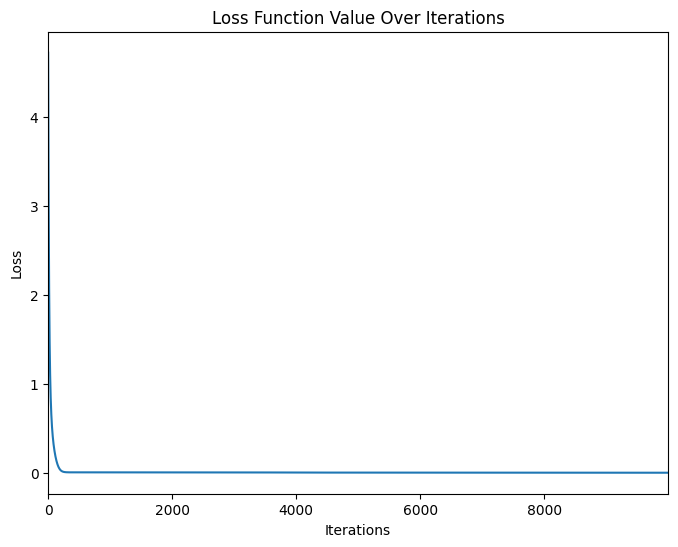

In [10]:
iterations = 10000
function_loss = []

for i in range(iterations):
    with tf.GradientTape() as tape:
        train_loss = loss_function(t_train, u_hat)
        function_loss.append(train_loss)
        grad_w = tape.gradient(train_loss, u_hat.trainable_variables)
        optimizer.apply_gradients(zip(grad_w, u_hat.trainable_variables))

    if i % 1000 == 0:
        print(f"Iteration {i}\nLoss function value equal to {train_loss.numpy()}.")


plt.figure(figsize=(8, 6))
plt.rcParams['axes.xmargin'] = 0
plt.plot(function_loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Function Value Over Iterations")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


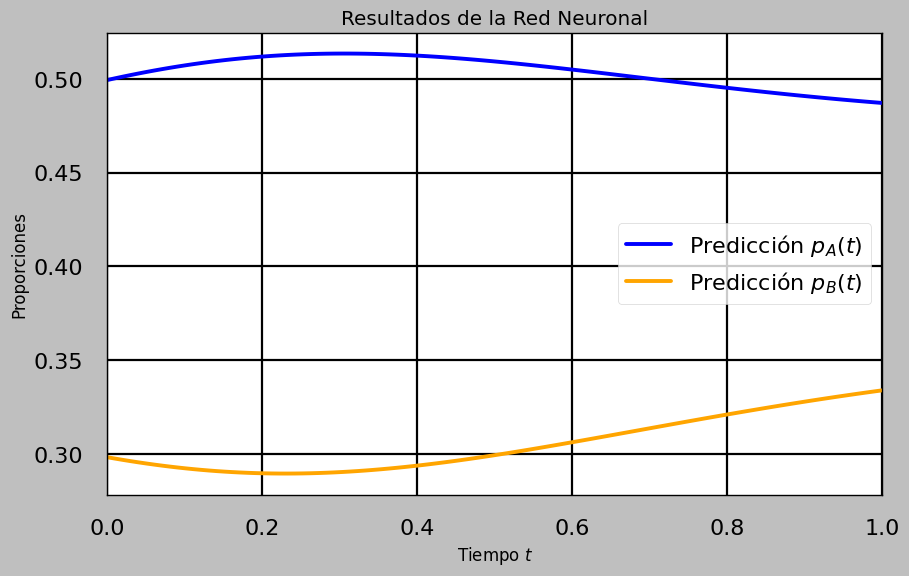

In [28]:
t_values = np.linspace(0, 1, 100).reshape(-1, 1)
t_tensor = tf.constant(t_values, dtype=tf.float32)

predictions = u_hat.predict(t_tensor)
p_A_pred = predictions[:, 0]
p_B_pred = predictions[:, 1]  #

plt.figure(figsize=(10, 6))

plt.plot(t_values, p_A_pred, label="Predicción $p_A(t)$", color="blue")

plt.plot(t_values, p_B_pred, label="Predicción $p_B(t)$", color="orange")

plt.xlabel("Tiempo $t$")
plt.ylabel("Proporciones")
plt.title("Resultados de la Red Neuronal")
plt.legend()
plt.show()


# Runge Kutta

In [30]:
c_A, c_B = 0.2, 0.4
X_t, Y_t = 0.5, 0.5

def treatment_costs(t):
    d_A = 0.2 if t <= 0.25 else 0.0
    d_B = 0.0 if t <= 0.25 else 0.4
    return d_A, d_B

def fitness_W_RA(p_A, d_B):
    return 1 - c_A - d_B + (1 - p_A) * X_t

def fitness_W_RB(p_B, d_A):
    return 1 - c_B - d_A + (1 - p_B) * Y_t

def fitness_W_S(d_A, d_B):
    return 1 - d_A - d_B

def avg_fitness(p_A, p_B, W_RA, W_RB, W_S):
    return p_A * W_RA + p_B * W_RB + (1 - p_A - p_B) * W_S

def system(t, p_A, p_B):
    d_A, d_B = treatment_costs(t)
    W_RA = fitness_W_RA(p_A, d_B)
    W_RB = fitness_W_RB(p_B, d_A)
    W_S = fitness_W_S(d_A, d_B)
    W_avg = avg_fitness(p_A, p_B, W_RA, W_RB, W_S)

    dpA_dt = p_A * (W_RA - W_avg)
    dpB_dt = p_B * (W_RB - W_avg)
    return dpA_dt, dpB_dt

def runge_kutta(f, t0, tf, p_A0, p_B0, h):
    t_values = np.arange(t0, tf + h, h)
    p_A_values = [p_A0]
    p_B_values = [p_B0]

    p_A, p_B = p_A0, p_B0

    for t in t_values[:-1]:
        k1_A, k1_B = f(t, p_A, p_B)
        k2_A, k2_B = f(t + h / 2, p_A + h * k1_A / 2, p_B + h * k1_B / 2)
        k3_A, k3_B = f(t + h / 2, p_A + h * k2_A / 2, p_B + h * k2_B / 2)
        k4_A, k4_B = f(t + h, p_A + h * k3_A, p_B + h * k3_B)

        p_A += h / 6 * (k1_A + 2 * k2_A + 2 * k3_A + k4_A)
        p_B += h / 6 * (k1_B + 2 * k2_B + 2 * k3_B + k4_B)

        p_A_values.append(p_A)
        p_B_values.append(p_B)

    return t_values, np.array(p_A_values), np.array(p_B_values)

t0 = 0
tf = 1
h = 0.01
p_A0 = 0.5
p_B0 = 0.3

t_values, p_A_values, p_B_values = runge_kutta(system, t0, tf, p_A0, p_B0, h)


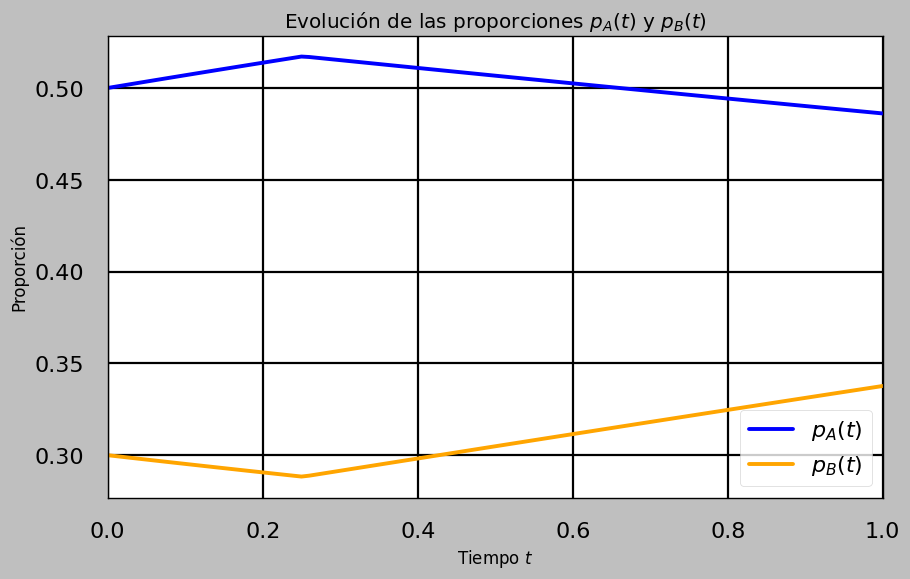

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(t_values, p_A_values, label="$p_A(t)$", color="blue")
plt.plot(t_values, p_B_values, label="$p_B(t)$", color="orange")
plt.xlabel("Tiempo $t$")
plt.ylabel("Proporción")
plt.title("Evolución de las proporciones $p_A(t)$ y $p_B(t)$")
plt.legend()
plt.show()

# Comparación

In [ ]:

t_tf = tf.constant(t_values.reshape(-1, 1), dtype=tf.float32)

pred_u = u_hat.predict(t_tf)
print(pred_u.shape)
p_A_pred = pred_u[:, 0]
p_B_pred = pred_u[:, 1]

plt.figure(figsize=(10, 6))

# p_A
plt.plot(t_values, p_A_values, label="Referencia $p_A(t)$", color="blue")
plt.plot(t_values, p_A_pred, "--", label="Predicción $p_A(t)$", color="cyan")

# p_B
plt.plot(t_values, p_B_values, label="Referencia $p_B(t)$", color="orange")
plt.plot(t_values, p_B_pred, "--", label="Predicción $p_B(t)$", color="red")

plt.xlabel("Tiempo $t$")
plt.ylabel("Proporciones")
plt.title("Comparación de resultados: Referencia vs Red Neuronal")
plt.legend()
plt.grid(True)
plt.show()

# Linealidad

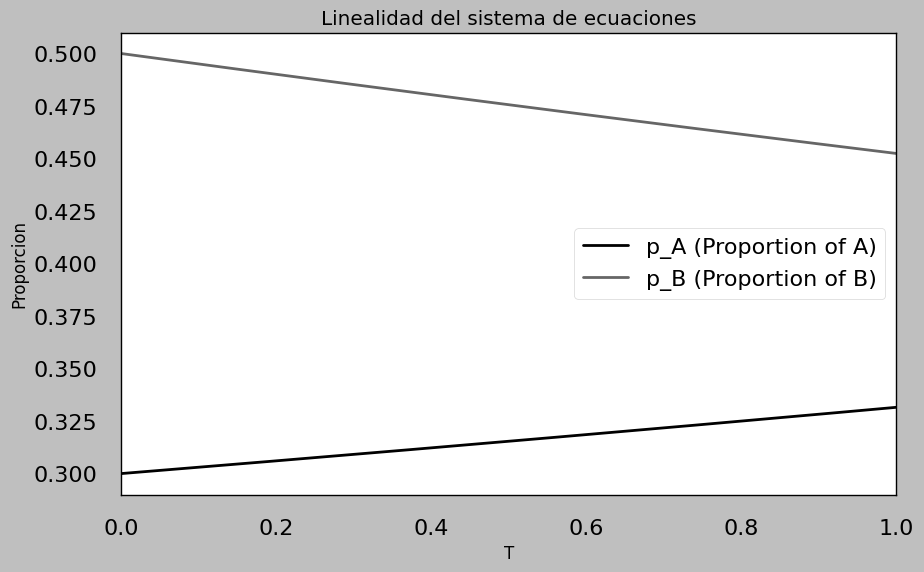

In [52]:

def replicator_matrix(W_RA, W_RB, W_S):
    W_bar = np.array([
        [W_RA - (W_RA + W_RB) / 2, 0],
        [0, W_RB - (W_RA + W_RB) / 2]
    ])
    return W_bar

def solve_linear_system(W_matrix, p0, t_span):

    eigvals, eigvecs = np.linalg.eig(W_matrix)
    C = np.linalg.solve(eigvecs, p0)

    p_solution = np.array([
        C[0] * np.exp(eigvals[0] * t) * eigvecs[:, 0] +
        C[1] * np.exp(eigvals[1] * t) * eigvecs[:, 1]
        for t in t_span
    ])
    return p_solution

W_RA = 1.2
W_RB = 1.0
W_S = 0.8

p0 = np.array([0.3, 0.5])

t_span = np.linspace(0, 10, 500)

W_matrix = replicator_matrix(W_RA, W_RB, W_S)
p_solution = solve_linear_system(W_matrix, p0, t_span)

t_span_restricted = np.linspace(0, 1, 500)
p_solution_restricted = solve_linear_system(W_matrix, p0, t_span_restricted)

p_A_restricted = p_solution_restricted[:, 0]
p_B_restricted = p_solution_restricted[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(t_span_restricted, p_A_restricted, label='p_A (Proportion of A)', linewidth=2)
plt.plot(t_span_restricted, p_B_restricted, label='p_B (Proportion of B)', linewidth=2)
plt.title('Linealidad del sistema de ecuaciones')
plt.xlabel('T')
plt.ylabel('Proporcion')
plt.legend()
plt.grid()
plt.show()


# Comparación final

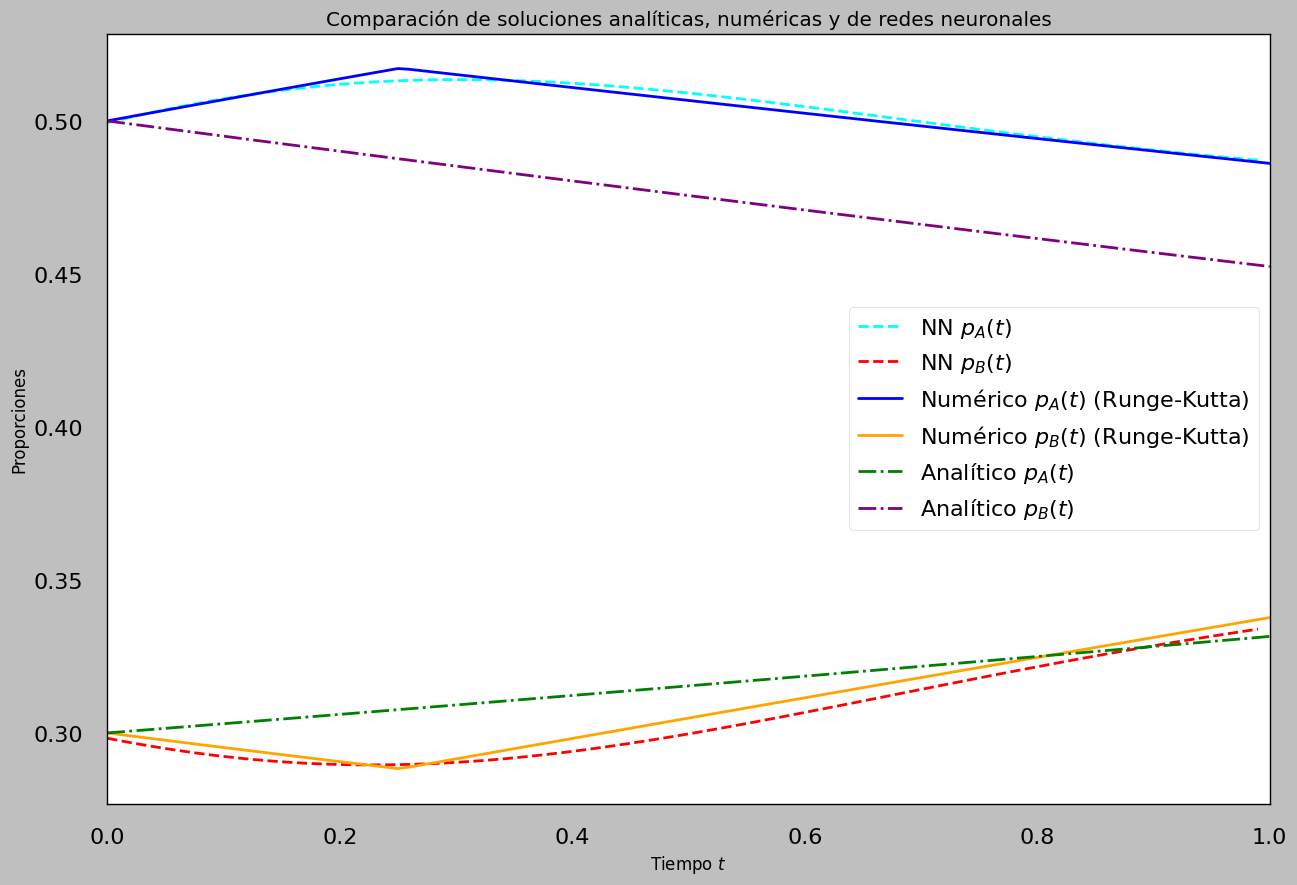

In [50]:
t_values_nn = t_values[:p_A_pred.shape[0]]

plt.figure(figsize=(15, 10))

plt.plot(t_values_nn, p_A_pred, "--", label="NN $p_A(t)$", color="cyan", linewidth=2)
plt.plot(t_values_nn, p_B_pred, "--", label="NN $p_B(t)$", color="red", linewidth=2)

plt.plot(t_values, p_A_values, label="Numérico $p_A(t)$ (Runge-Kutta)", color="blue", linewidth=2)
plt.plot(t_values, p_B_values, label="Numérico $p_B(t)$ (Runge-Kutta)", color="orange", linewidth=2)

plt.plot(t_span_restricted, p_A_restricted, label="Analítico $p_A(t)$", linestyle="-.", color="green", linewidth=2)
plt.plot(t_span_restricted, p_B_restricted, label="Analítico $p_B(t)$", linestyle="-.", color="purple", linewidth=2)

plt.xlabel("Tiempo $t$")
plt.ylabel("Proporciones")
plt.title("Comparación de soluciones analíticas, numéricas y de redes neuronales")
plt.legend()
plt.grid()
plt.show()
